In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_data=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
null_perc  =(df_data.isnull().sum().sort_values(ascending=False)/len(df_data)*100)
to_keep = null_perc.index[null_perc < 15]
df_data = df_data[to_keep]

df_test = df_test[[i for i in to_keep if i!= 'SalePrice']]
(df_test.isnull().sum().sort_values(ascending=False)/len(df_test)*100)[:20]

GarageYrBlt     5.346127
GarageCond      5.346127
GarageFinish    5.346127
GarageQual      5.346127
GarageType      5.209047
BsmtCond        3.084304
BsmtExposure    3.015764
BsmtQual        3.015764
BsmtFinType2    2.878684
BsmtFinType1    2.878684
MasVnrType      1.096642
MasVnrArea      1.028101
MSZoning        0.274160
Utilities       0.137080
BsmtFullBath    0.137080
Functional      0.137080
BsmtHalfBath    0.137080
BsmtUnfSF       0.068540
SaleType        0.068540
BsmtFinSF2      0.068540
dtype: float64

In [4]:
df_data = df_data.fillna(df_data.median())
df_test = df_test.fillna(df_data.median())

C:\Users\vijaya\AppData\Local\Temp\ipykernel_23000\3867347139.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_data = df_data.fillna(df_data.median())
C:\Users\vijaya\AppData\Local\Temp\ipykernel_23000\3867347139.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test = df_test.fillna(df_data.median())


In [5]:
filteredColumns = df_data.dtypes.index[df_data.dtypes == np.object]

C:\Users\vijaya\AppData\Local\Temp\ipykernel_23000\3749096221.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filteredColumns = df_data.dtypes.index[df_data.dtypes == np.object]


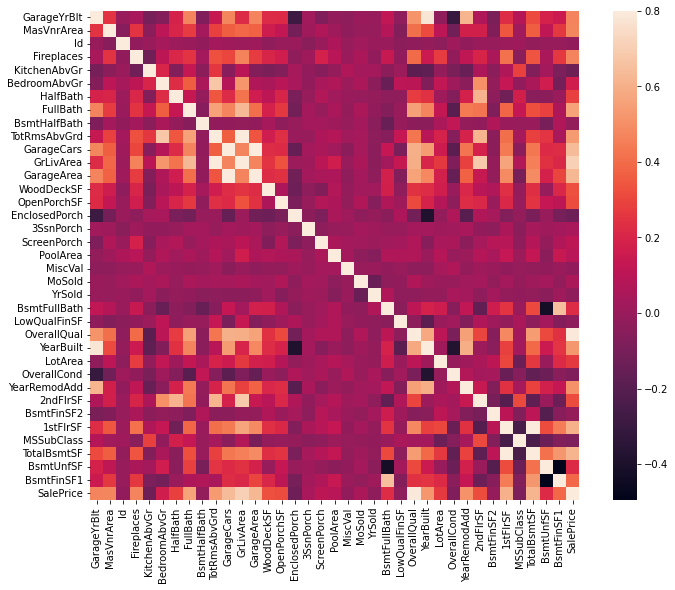

In [6]:
corrmat = df_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

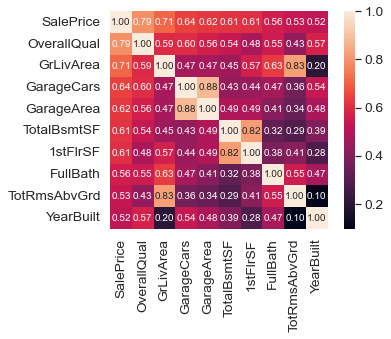

In [7]:
#saleprice correlation matrix
m = 10 #number of variables for heatmap
cols = corrmat.nlargest(m, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
len(filteredColumns)

38

In [9]:
numerical_columns = [i for i in df_test.columns if i not in filteredColumns if i not in ['SalePrice', 'Id']]
if 'SalePrice' in numerical_columns:
    raise Exception('label should not be in numeric cols')

In [10]:
obj_df=df_data[filteredColumns].copy()
obj_df_test=df_test[filteredColumns].copy()

In [11]:
#checking unique values in obj_df
obj_df.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
RoofMatl          8
Condition2        8
HouseStyle        8
Functional        7
BsmtFinType1      6
GarageType        6
RoofStyle         6
Foundation        6
SaleCondition     6
BsmtFinType2      6
Heating           6
MSZoning          5
LotConfig         5
ExterCond         5
GarageCond        5
BldgType          5
GarageQual        5
Electrical        5
HeatingQC         5
BsmtExposure      4
KitchenQual       4
LandContour       4
LotShape          4
ExterQual         4
MasVnrType        4
BsmtCond          4
BsmtQual          4
GarageFinish      3
LandSlope         3
PavedDrive        3
Street            2
Utilities         2
CentralAir        2
dtype: int64

In [12]:
obj_df_test.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      15
Exterior1st      13
SaleType          9
Condition1        9
HouseStyle        7
Functional        7
GarageType        6
BsmtFinType2      6
Foundation        6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Condition2        5
GarageCond        5
LotConfig         5
ExterCond         5
MSZoning          5
BldgType          5
HeatingQC         5
MasVnrType        4
GarageQual        4
ExterQual         4
BsmtExposure      4
BsmtQual          4
BsmtCond          4
Heating           4
RoofMatl          4
LotShape          4
LandContour       4
Electrical        4
KitchenQual       4
PavedDrive        3
GarageFinish      3
LandSlope         3
Street            2
CentralAir        2
Utilities         1
dtype: int64

In [13]:
obj_df["MSZoning"] = np.where(obj_df["MSZoning"].str.contains("RL","RM"), 1, 0)

In [14]:
obj_df_test["MSZoning"] = np.where(obj_df_test["MSZoning"].str.contains("RL","RM"), 1, 0)

In [15]:
#performing one hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,)
ohe.fit(obj_df)
new_encoded=ohe.transform(obj_df)

In [16]:

#performing one hot encoding test_data
obj_df_test = obj_df_test.fillna(obj_df_test.mode().loc[0])
new_encoded_test=ohe.transform(obj_df_test)

In [17]:
new_encoded_test.shape,new_encoded.shape

((1459, 242), (1460, 242))

In [18]:
# import matplotlib.pylab as plt
# plt.style.use("seaborn")
# plt.figure(figsize=(12,12))
# sns.heatmap(new_encoded)

In [19]:
new_df=df_data[numerical_columns].copy()

In [20]:
new_df_test=df_test[numerical_columns].copy()

In [21]:
new_df.isna().sum().sort_values(ascending=False)

GarageYrBlt      0
OverallCond      0
YrSold           0
BsmtFullBath     0
LowQualFinSF     0
OverallQual      0
YearBuilt        0
LotArea          0
YearRemodAdd     0
MiscVal          0
2ndFlrSF         0
BsmtFinSF2       0
1stFlrSF         0
MSSubClass       0
TotalBsmtSF      0
BsmtUnfSF        0
MoSold           0
PoolArea         0
MasVnrArea       0
TotRmsAbvGrd     0
Fireplaces       0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
GarageCars       0
ScreenPorch      0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
BsmtFinSF1       0
dtype: int64

In [22]:
new_encoded = pd.DataFrame(new_encoded, columns=ohe.get_feature_names())
new_encoded_test = pd.DataFrame(new_encoded_test, columns=ohe.get_feature_names())

C:\Users\vijaya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vijaya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
final_df=pd.concat([new_df,new_encoded],axis=1)

In [24]:
frames=[new_df_test,new_encoded_test]
final_df_test=pd.concat(frames, axis=1)
final_df_test.shape

(1459, 277)

In [25]:
from sklearn.model_selection import train_test_split
y=df_data['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(final_df,y,test_size=0.25,random_state=42)

In [26]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,10))
# sns.heatmap(final_df.corr(),annot=True)

In [27]:
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1095, 277) (1095,)
(365, 277) (365,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

regressor=LinearRegression()
regressor.fit(X_train,y_train)
# R_square 

y_predict = regressor.predict(X_test)
# Evaluate Model (RMSE, MAPE)
rmse = mean_squared_error(y_test, y_predict, squared=False)
print("Root Mean Squared Error of Prediction: {}".format(rmse))

mape = mean_absolute_percentage_error(y_test, y_predict)
print("Mean Absolute Percentage Error of Prediction: {}".format(mape))

# Evaluate Training (Fitting)
print('R^2 train score: ', regressor.score(X_train, y_train))

print('R^2 test score: ', regressor.score(X_test, y_test))

Root Mean Squared Error of Prediction: 281254247.1771218
Mean Absolute Percentage Error of Prediction: 126.10857324384106
R^2 train score:  0.9330699607801445
R^2 test score:  -11291999.247834025


In [29]:
regressor.predict(final_df_test)

array([118921.77130127, 159557.5538559 , 186905.3170929 , ...,
       176029.40420532, 101210.76049042, 219430.04354858])

In [30]:
final_df_test.head()

,GarageYrBlt,MasVnrArea,Fireplaces,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,TotRmsAbvGrd,GarageCars,...,x36_Wd Sdng,x36_WdShing,x37_ClyTile,x37_CompShg,x37_Membran,x37_Metal,x37_Roll,x37_Tar&Grv,x37_WdShake,x37_WdShngl
0,1961.0,0.0,0,1,2,0,1,0.0,5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1958.0,108.0,0,1,3,1,1,0.0,6,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997.0,0.0,1,1,3,1,2,0.0,6,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998.0,20.0,1,1,3,1,2,0.0,7,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1992.0,0.0,0,1,2,0,2,0.0,5,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
new_df.shape

(1460, 35)

In [32]:
new_df_test.shape

(1459, 35)

In [33]:
df_predicted_final=pd.DataFrame()
df_predicted_final['Id']=df_test['Id'].values
df_predicted_final['SalePrice']=regressor.predict(final_df_test)

In [34]:
df_predicted_final.to_csv('housing.csv', index='False')